#### Problem Statement:
X Education, an online course provider, seeks to improve lead conversion by identifying “Hot Leads” with higher conversion potential. X Education acquires leads through website browsing, form submissions, and past referrals. Sales team contacts leads through calls and emails, aiming to convert them into customers. The company aims to achieve an 80% lead conversion rate through a model that assigns lead scores to each lead.

***Goal:***  

Improve lead conversion rate from 30% to 80% by identifying “Hot Leads” with higher conversion potential.

The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## 1. Importing Libraries

In [3]:
# Importing the required packages
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
warnings.filterwarnings('ignore')

# 2. Reading Dataset and Understanding Data

In [6]:
#Read the csv file using pandas
leads_df = pd.read_csv('Leads.csv')

In [7]:
#check first five rows
leads_df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
#check the shape
leads_df.shape

(9240, 37)

In [9]:
#check dataframe for null and datatype 
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
#check the numerical data details
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [11]:
#check the columns of data
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

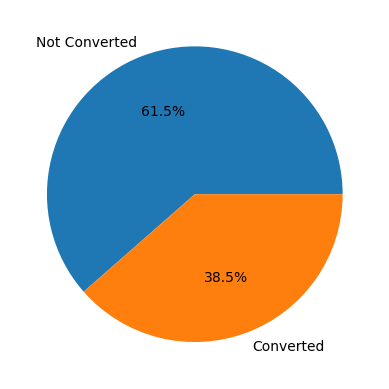

In [12]:
# Data distribution based on Target variable
leads_df['Converted'].value_counts(normalize=True).plot.pie(autopct='%.1f%%',labels=['Not Converted','Converted'])
plt.ylabel('')
plt.show()

**Inference**  
- There are 9240 rows and 37 columns in the data set. 
- There are null values in some of the columns that need to be reviewed and cleaned.
- The dataset has an overall conversion rate of around 38%  

# 3. Cleaning Data

## 3.1 Handle Missing values

In [16]:
# Number of null values in each column - displaying them in descending order
leads_df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [17]:
# Percentage of null values in each column- displaying in descending order
100*leads_df.isnull().mean().sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

**Inference** 
- There are 13 columns with more than 15% of null values in them. 

Let's start with dropping columns that have 30% or more null values as they have significant gaps in the data

## 3.2 Handle Missing values (> 30%)

In [20]:
#creating a variable for storing null columns having missing values more than 30% and to be dropped
cut_off=30
cols_to_drop= list(leads_df.columns[100*leads_df.isnull().mean()>cut_off])
print("Num of columns having missing values more than 30% :",len(cols_to_drop))
print("List of columns to be dropped: ", cols_to_drop)


Num of columns having missing values more than 30% : 6
List of columns to be dropped:  ['Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [21]:
# Now lets drop all the columns having missing values more than 30%
leads_df.drop(columns = cols_to_drop, inplace = True)

In [22]:
# Percentage of null values in each column- displaying in descending order
100*leads_df.isnull().mean().sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.0000

## 3.3 Handle missing values (> 15%)

In [24]:
cut_off=15
cols_gt_15= list(leads_df.columns[100*leads_df.isnull().mean()>cut_off])
print(cols_gt_15)

['Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Lead Profile', 'City']


In [25]:
# Checking the percentage distribution of data within each columns across the differnet values
for c in cols_gt_15:
    print(f'Column: {c}')
    print(100*leads_df[c].value_counts()/leads_df.shape[0])
    print('------------------------')

Column: Country
Country
India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                  

**Inference**  
 
 - `Country` : Majority of the values are `India` (>70%) and the rest are less than 1%. This column can be **dropped** as it doesnt provided significant insight
 - `Specialization` : >20% have a value `Select` which means the user has not selected an option. These are as good as missing values. There are also 29% missing values which totals to around 50% rows with missing information.
 - `How did you hear about X Education` : More than 50% have `Select` as a value which is as good as missing. There are also 29% missing values which totals to around 79% rows with missing information.So, this column can be **dropped**
 - `What is your current occupation` : Most of the values are `Unemployed`. But occupation is tied with ability to enroll. We probably should only **drop the null rows** for this column. 
 - `What matters most to you in choosing a course` : Majority (>70%) are `Better Career Prospects`. Combined with 29% missing values this column doesn't seem to provide significant insight. It can be **dropped** 
 - `Lead Profile` : >44% have a value `Select` which means the user has not selected an option. These are as good as missing values. There are also 29% missing values which totals to around 73% rows with missing information. It can be **dropped** 
 - `City` : Most of them (34%) are `Mumbai`. 24% has no value selected and 15% are null. The rest are <10%. It can be **dropped**

In [27]:
# Drop the identified columns
cols_to_drop = ['Country','How did you hear about X Education','What matters most to you in choosing a course','Lead Profile','City']
leads_df.drop(columns = cols_to_drop, inplace = True)

In [28]:
# Drop only the null rows for current occupation column
leads_df = leads_df[~pd.isnull(leads_df['What is your current occupation'])]

In [29]:
# Check the null value percentage
100*leads_df.isnull().mean().sort_values(ascending=False)

TotalVisits                                 1.984733
Page Views Per Visit                        1.984733
Last Activity                               1.572519
Lead Source                                 0.549618
Specialization                              0.274809
Prospect ID                                 0.000000
X Education Forums                          0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
Search                                      0.000000
Newspaper Article                           0.000000
Magazine                                    0.000000
Lead Number                                 0.

- This reduces the missing columns to a very small number

## 3.4 Handle rest of the missing values

In [32]:
leads_df.shape

(6550, 26)

In [33]:
# Check the null values
leads_df.isnull().sum().sort_values(ascending=False)

TotalVisits                                 130
Page Views Per Visit                        130
Last Activity                               103
Lead Source                                  36
Specialization                               18
Prospect ID                                   0
X Education Forums                            0
A free copy of Mastering The Interview        0
I agree to pay the amount through cheque      0
Get updates on DM Content                     0
Update me on Supply Chain Content             0
Receive More Updates About Our Courses        0
Through Recommendations                       0
Digital Advertisement                         0
Newspaper                                     0
Search                                        0
Newspaper Article                             0
Magazine                                      0
Lead Number                                   0
What is your current occupation               0
Total Time Spent on Website             

In [34]:
# Drop only null rows for TotalVisits column - 130 out of 6550
leads_df = leads_df[~pd.isnull(leads_df['TotalVisits'])]

In [35]:
# Check the null values again
leads_df.isnull().sum().sort_values(ascending=False)

Lead Source                                 29
Specialization                              18
Prospect ID                                  0
Magazine                                     0
A free copy of Mastering The Interview       0
I agree to pay the amount through cheque     0
Get updates on DM Content                    0
Update me on Supply Chain Content            0
Receive More Updates About Our Courses       0
Through Recommendations                      0
Digital Advertisement                        0
Newspaper                                    0
X Education Forums                           0
Newspaper Article                            0
Search                                       0
Lead Number                                  0
What is your current occupation              0
Last Activity                                0
Page Views Per Visit                         0
Total Time Spent on Website                  0
TotalVisits                                  0
Converted    

In [36]:
leads_df.shape

(6420, 26)

In [37]:
# Drop only null rows for Lead Source column - 29 out of 6420
leads_df = leads_df[~pd.isnull(leads_df['Lead Source'])]

In [38]:
# Check the null values again
leads_df.isnull().sum().sort_values(ascending=False)

Specialization                              18
Prospect ID                                  0
Magazine                                     0
A free copy of Mastering The Interview       0
I agree to pay the amount through cheque     0
Get updates on DM Content                    0
Update me on Supply Chain Content            0
Receive More Updates About Our Courses       0
Through Recommendations                      0
Digital Advertisement                        0
Newspaper                                    0
X Education Forums                           0
Newspaper Article                            0
Search                                       0
Lead Number                                  0
What is your current occupation              0
Last Activity                                0
Page Views Per Visit                         0
Total Time Spent on Website                  0
TotalVisits                                  0
Converted                                    0
Do Not Call  

In [39]:
leads_df.shape

(6391, 26)

In [40]:
# Drop only null rows for Specialization column - 18 out of 6391
leads_df = leads_df[~pd.isnull(leads_df['Specialization'])]

In [41]:
# Check the null values again
leads_df.isnull().sum().sort_values(ascending=False)

Prospect ID                                 0
Lead Number                                 0
A free copy of Mastering The Interview      0
I agree to pay the amount through cheque    0
Get updates on DM Content                   0
Update me on Supply Chain Content           0
Receive More Updates About Our Courses      0
Through Recommendations                     0
Digital Advertisement                       0
Newspaper                                   0
X Education Forums                          0
Newspaper Article                           0
Magazine                                    0
Search                                      0
What is your current occupation             0
Specialization                              0
Last Activity                               0
Page Views Per Visit                        0
Total Time Spent on Website                 0
TotalVisits                                 0
Converted                                   0
Do Not Call                       

- This completes the cleanup for missing values

In [43]:
leads_df.shape

(6373, 26)

## 3.4 Check unwanted columns to drop

In [45]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6373 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               6373 non-null   object 
 1   Lead Number                               6373 non-null   int64  
 2   Lead Origin                               6373 non-null   object 
 3   Lead Source                               6373 non-null   object 
 4   Do Not Email                              6373 non-null   object 
 5   Do Not Call                               6373 non-null   object 
 6   Converted                                 6373 non-null   int64  
 7   TotalVisits                               6373 non-null   float64
 8   Total Time Spent on Website               6373 non-null   int64  
 9   Page Views Per Visit                      6373 non-null   float64
 10  Last Activity                            

`Prospect ID` and `Lead Number` can be dropped as they only serve are row idenfiers

In [47]:
leads_df.drop(columns=['Prospect ID','Lead Number'],inplace=True)

In [48]:
# Get the list of all categorical columns
ind = leads_df.dtypes[leads_df.dtypes==np.dtype('O')].index
cat_cols = list(ind)
print(cat_cols)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


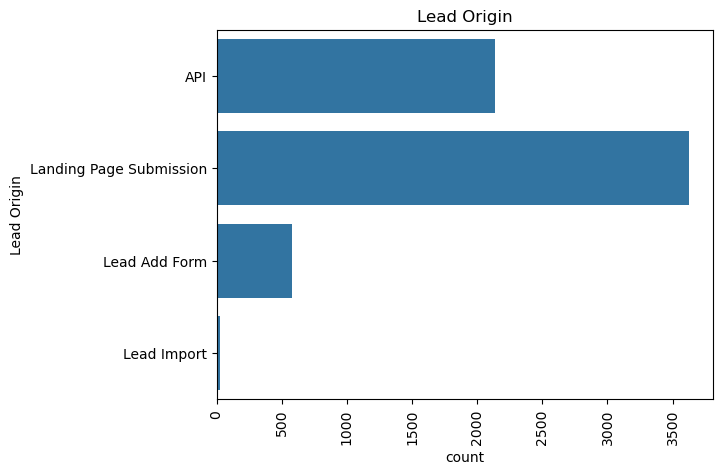

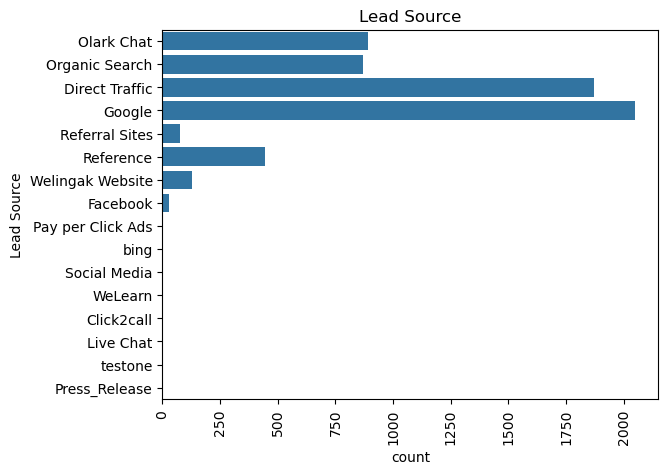

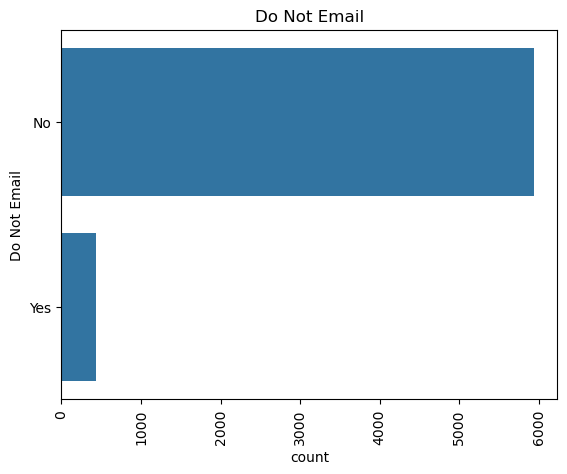

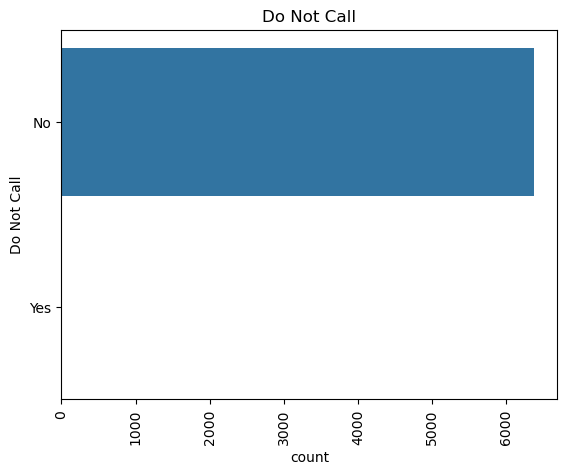

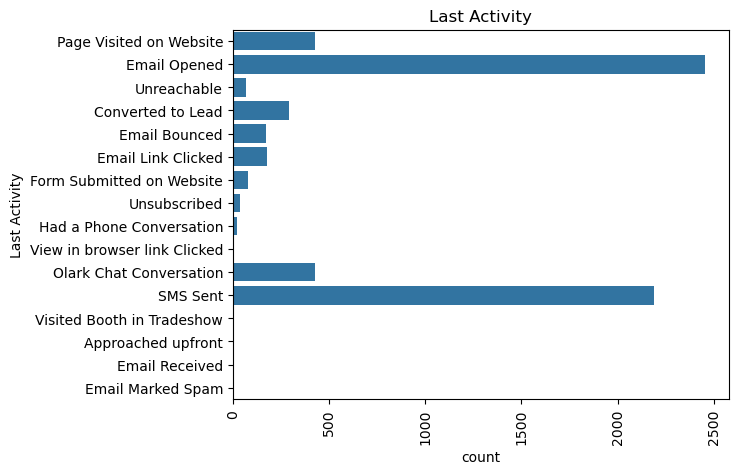

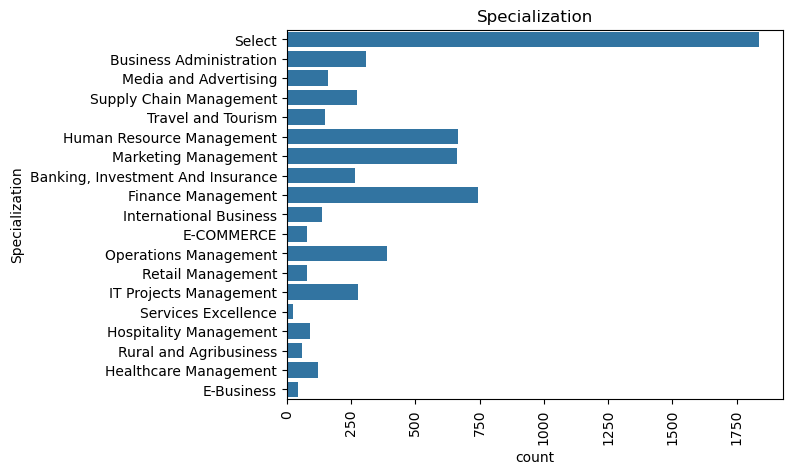

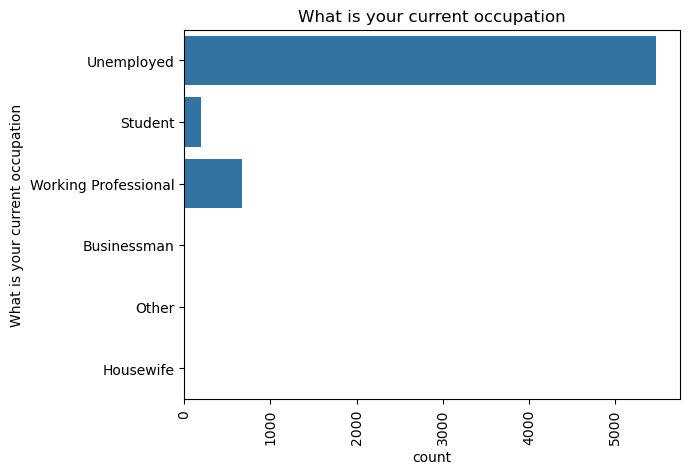

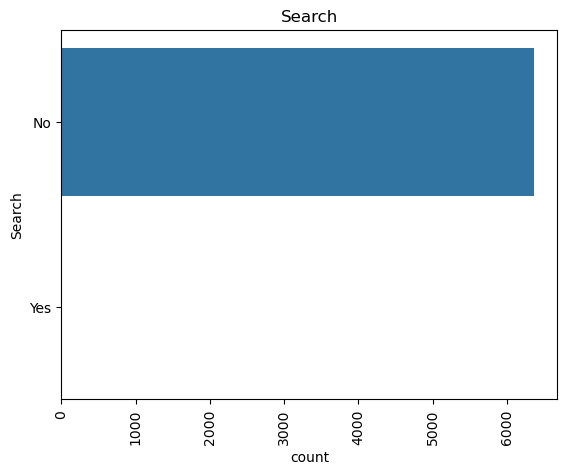

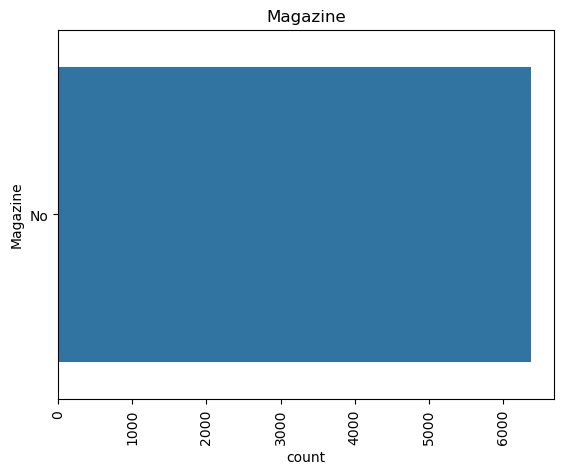

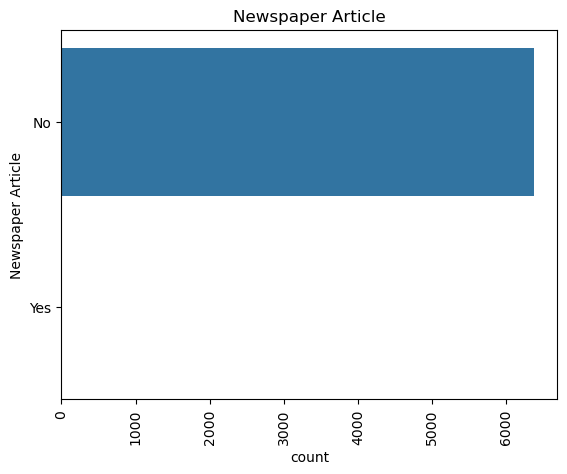

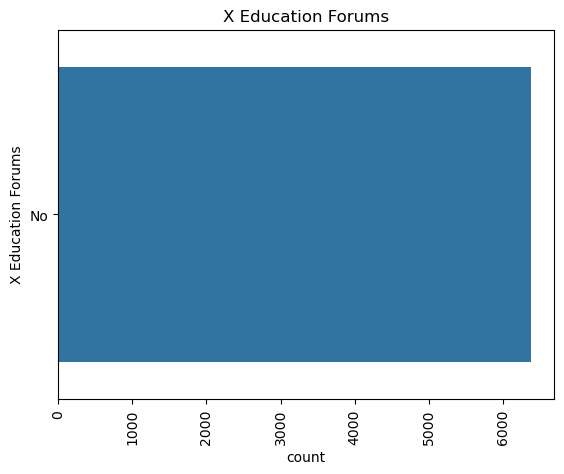

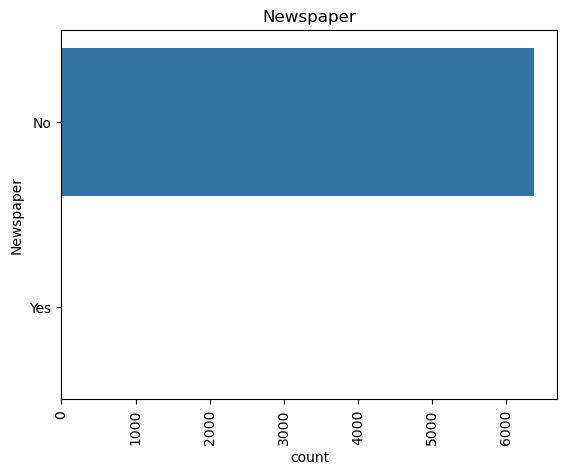

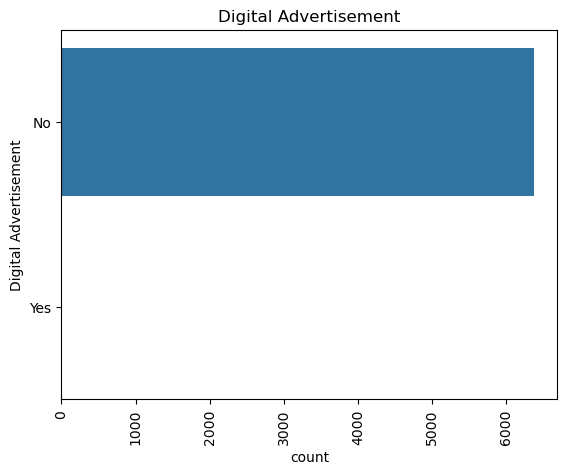

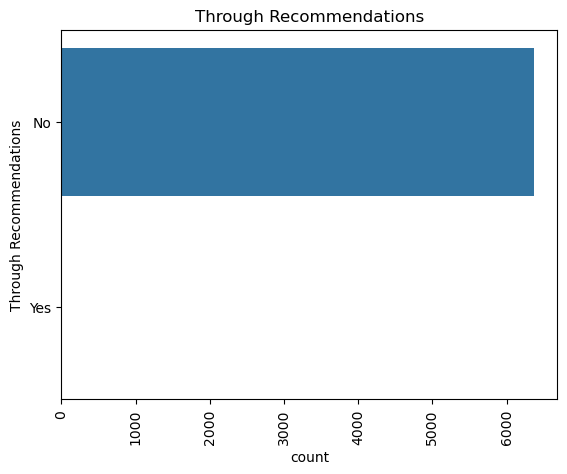

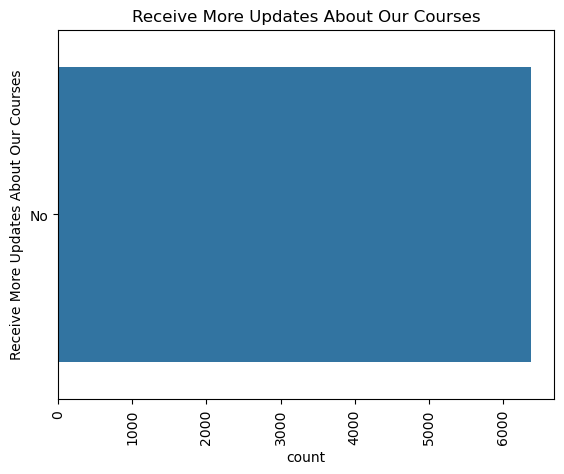

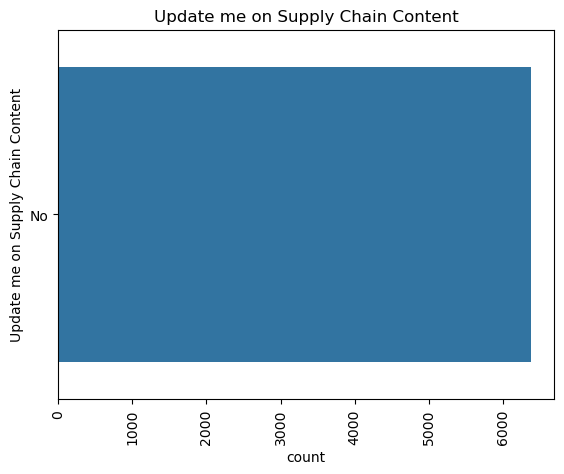

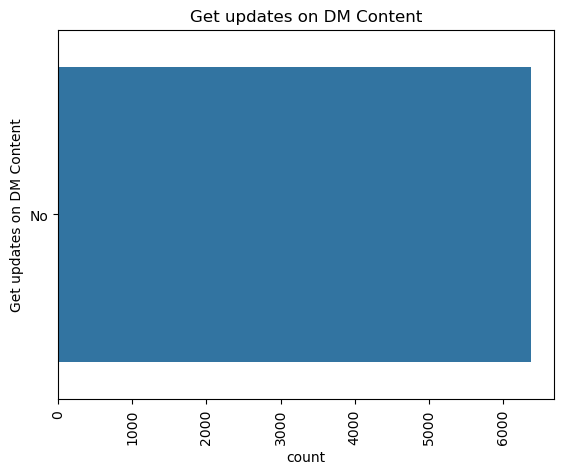

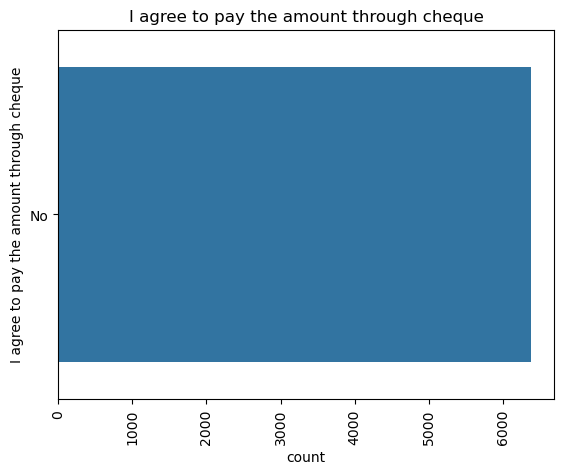

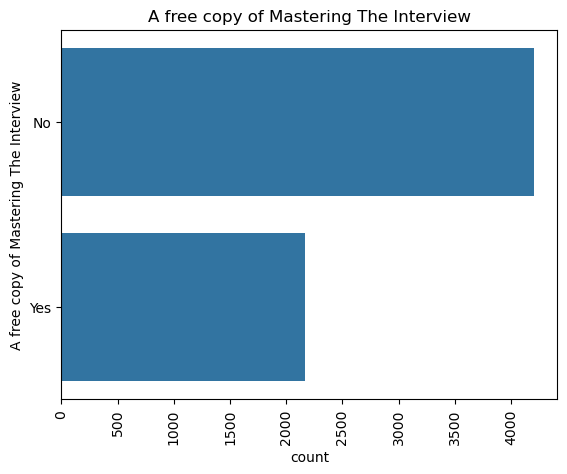

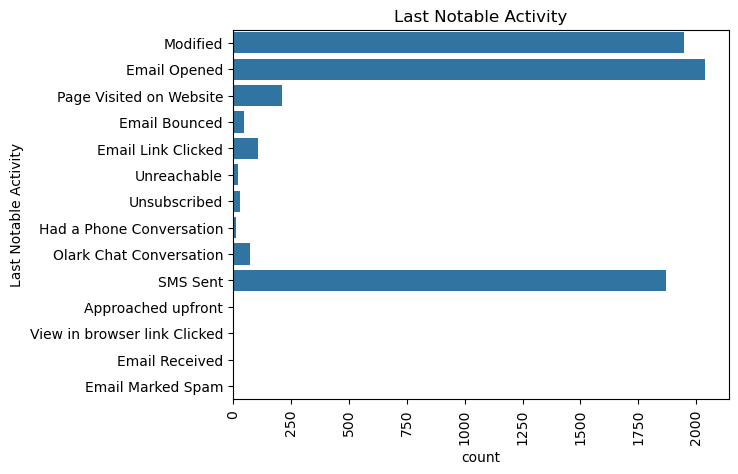

In [49]:
# Plot the data distribution within each categorical column
for c in cat_cols:
    sns.countplot(data=leads_df,y=c)
    plt.title(c)
    plt.xticks(rotation=90)
    plt.show()

**Inference**  
The data in the following columns is heavily skewed to one value. These columns can be dropped
- `Do Not Call`,
- `Search`,
- `Magazine`,
- `Newspaper Article`,
- `X Education Forums`,
- `Newspaper`,
- `Digital Advertisement`,
- `Through Recommendations`,
- `Receive More Updates About Our Courses`,
- `Update me on Supply Chain Content`,
- `Get updates on DM Content`,
- `I agree to pay the amount through cheque`


In [51]:
# Drop the identified columns
leads_df.drop(columns=['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], inplace = True)

In [52]:
leads_df.shape

(6373, 12)

- The cleanup has brought the row count from 9240 to 6373 which is 69% of the provided data

# 4. EDA

## 4.1 Draw heatmap to check for any linear correlation

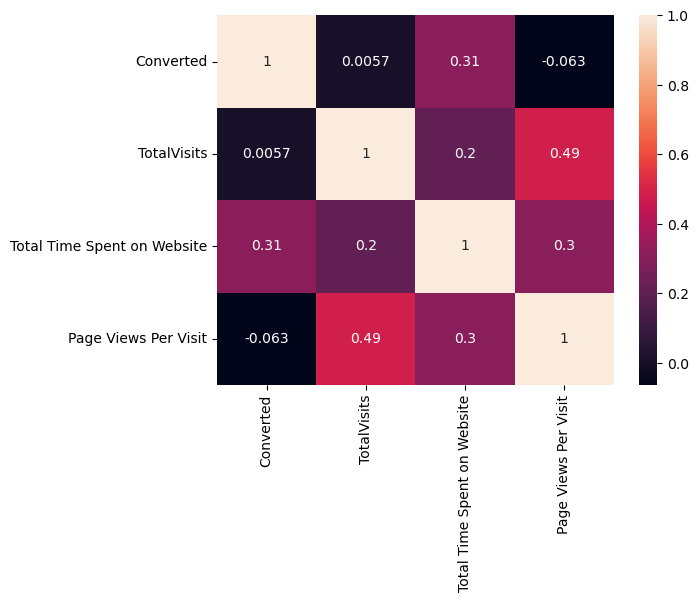

In [56]:
sns.heatmap(leads_df.corr(numeric_only=True) ,annot=True)
plt.show()

- Only `Total Time spent on Website` seem to have a noticable linear correlation with the target variable `Converted` which makes sense

## 4.2 Draw pair Plots to check the linear relationship

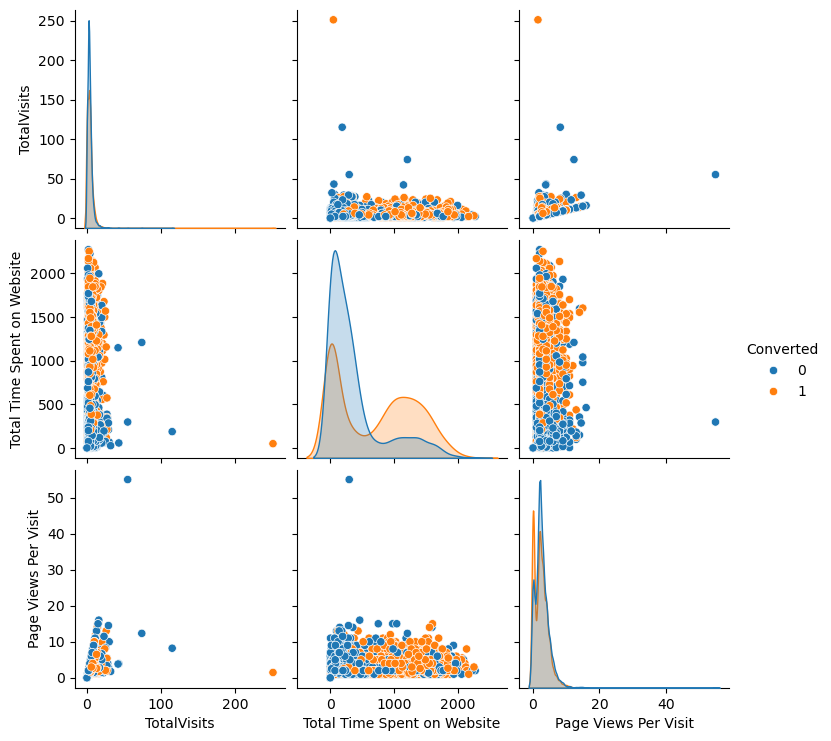

In [59]:
sns.pairplot(data=leads_df,hue='Converted')
plt.show()

## 4.5 Analysing Categorical Variabels with target variables

In [61]:
# Function to genearte the conversion rate for values in each column provided
def display_conversion_rate(col):
    s1 = leads_df[col][leads_df['Converted']==1].value_counts()
    s2 = leads_df[col][leads_df['Converted']==0].value_counts()
    p_df=pd.DataFrame({
        'Converted': s1,'Not Converted': s2
    })
    p_df['Rate'] = p_df['Converted']/(p_df['Converted']+p_df['Not Converted'])
    print(p_df.sort_values(by='Rate',ascending=False))

In [62]:
# Analyze the categorical columns distribution for the target variable
ind = leads_df.dtypes[leads_df.dtypes==np.dtype('O')].index
cat_cols = list(ind)
print(cat_cols)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']


                         Converted  Not Converted      Rate
Lead Origin                                                
Lead Add Form                  544             37  0.936317
API                            954           1186  0.445794
Landing Page Submission       1558           2067  0.429793
Lead Import                      9             18  0.333333


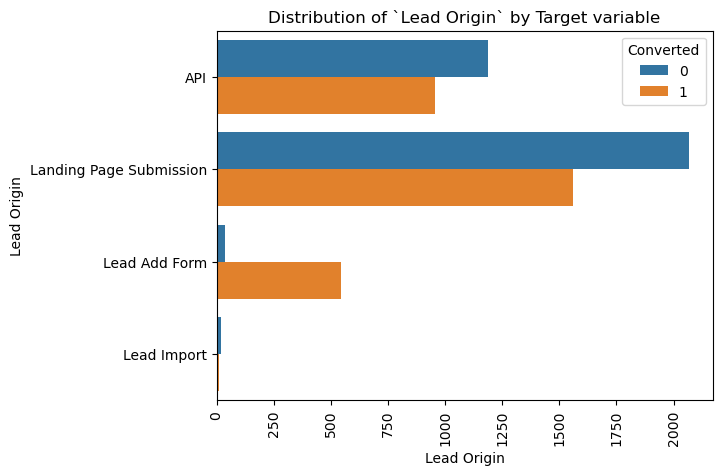

                   Converted  Not Converted      Rate
Lead Source                                          
Welingak Website       127.0            2.0  0.984496
Reference              410.0           33.0  0.925508
Click2call               3.0            1.0  0.750000
Social Media             1.0            1.0  0.500000
Google                1015.0         1033.0  0.495605
Organic Search         381.0          489.0  0.437931
Olark Chat             380.0          512.0  0.426009
Direct Traffic         707.0         1166.0  0.377469
Referral Sites          28.0           47.0  0.373333
bing                     1.0            2.0  0.333333
Facebook                 9.0           19.0  0.321429
Live Chat                2.0            NaN       NaN
Pay per Click Ads        NaN            1.0       NaN
Press_Release            NaN            1.0       NaN
WeLearn                  1.0            NaN       NaN
testone                  NaN            1.0       NaN


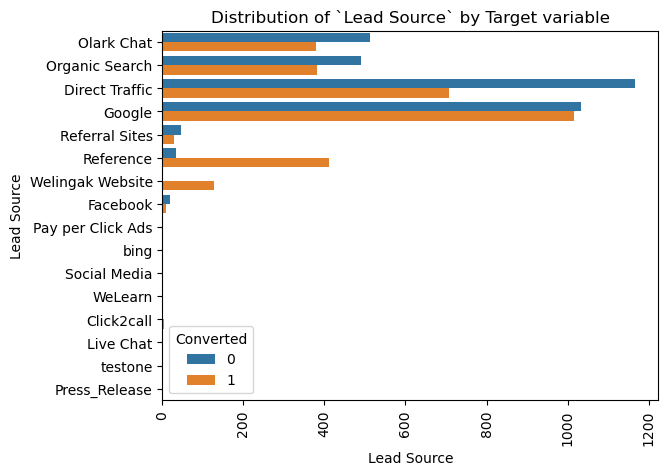

              Converted  Not Converted      Rate
Do Not Email                                    
No                 2975           2963  0.501010
Yes                  90            345  0.206897


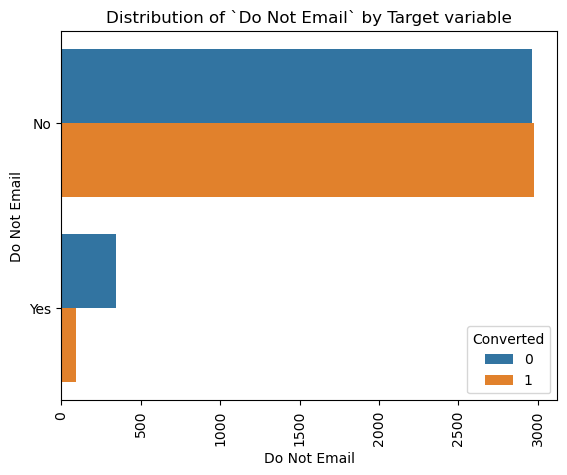

                              Converted  Not Converted      Rate
Last Activity                                                   
Had a Phone Conversation           19.0            4.0  0.826087
SMS Sent                         1485.0          704.0  0.678392
Email Opened                     1146.0         1309.0  0.466802
Email Link Clicked                 68.0          110.0  0.382022
Unreachable                        27.0           44.0  0.380282
Form Submitted on Website          26.0           55.0  0.320988
Page Visited on Website           136.0          291.0  0.318501
Unsubscribed                       11.0           29.0  0.275000
View in browser link Clicked        1.0            3.0  0.250000
Olark Chat Conversation            75.0          353.0  0.175234
Converted to Lead                  48.0          244.0  0.164384
Email Bounced                      14.0          161.0  0.080000
Approached upfront                  5.0            NaN       NaN
Email Marked Spam        

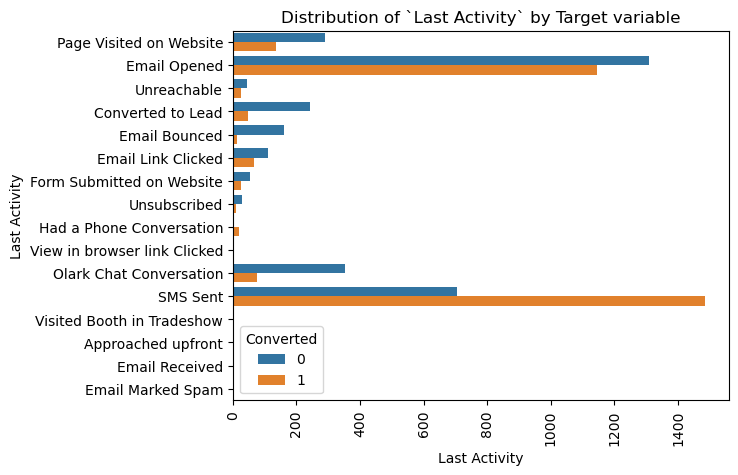

                                   Converted  Not Converted      Rate
Specialization                                                       
Healthcare Management                     71             51  0.581967
Banking, Investment And Insurance        151            115  0.567669
Marketing Management                     367            296  0.553544
Operations Management                    212            179  0.542199
Human Resource Management                345            320  0.518797
Finance Management                       386            359  0.518121
Rural and Agribusiness                    30             28  0.517241
Business Administration                  159            151  0.512903
Supply Chain Management                  136            139  0.494545
Media and Advertising                     77             84  0.478261
IT Projects Management                   130            148  0.467626
Hospitality Management                    41             49  0.455556
Travel and Tourism  

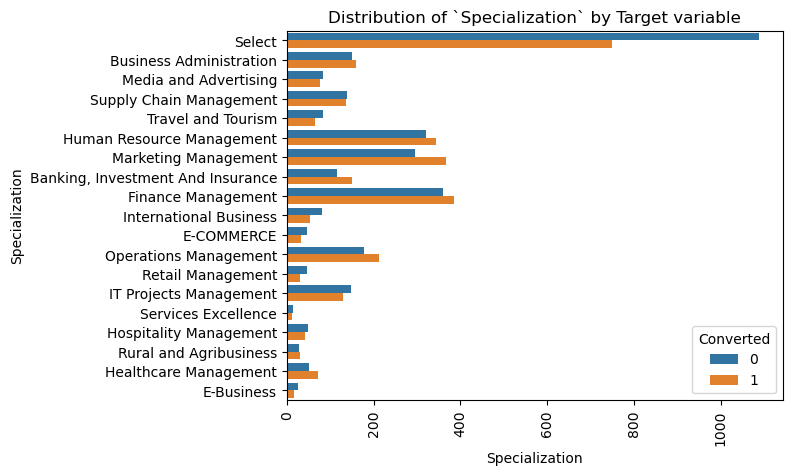

                                 Converted  Not Converted      Rate
What is your current occupation                                    
Working Professional                   622           51.0  0.924220
Businessman                              5            2.0  0.714286
Other                                    9            6.0  0.600000
Unemployed                            2346         3130.0  0.428415
Student                                 74          119.0  0.383420
Housewife                                9            NaN       NaN


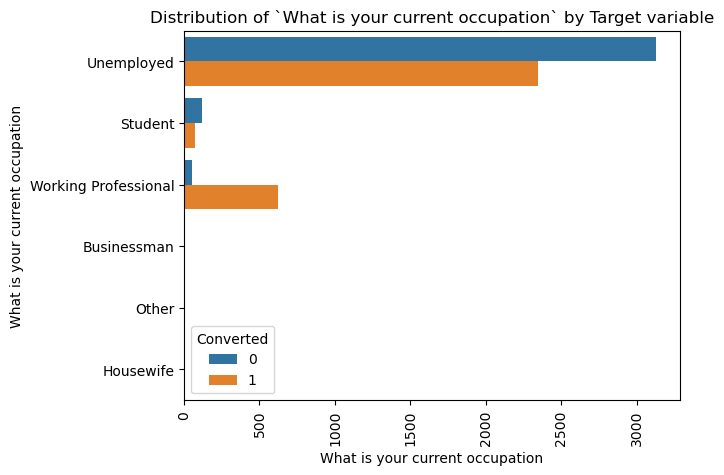

                                        Converted  Not Converted      Rate
A free copy of Mastering The Interview                                    
No                                           2164           2038  0.514993
Yes                                           901           1270  0.415016


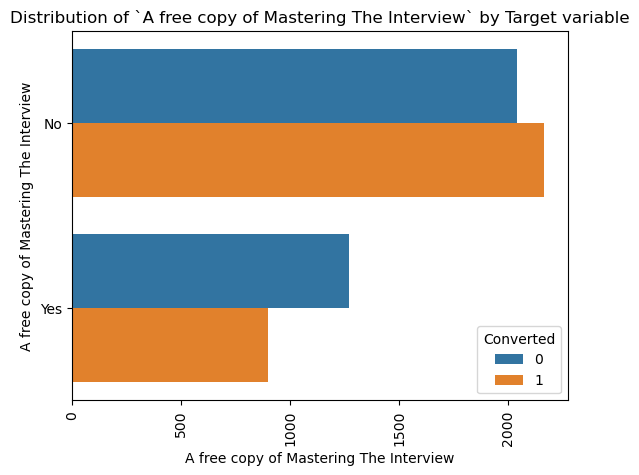

                              Converted  Not Converted      Rate
Last Notable Activity                                           
Unreachable                        20.0            2.0  0.909091
SMS Sent                         1311.0          558.0  0.701445
Email Opened                      965.0         1073.0  0.473503
Page Visited on Website            84.0          129.0  0.394366
Email Link Clicked                 42.0           68.0  0.381818
Olark Chat Conversation            23.0           53.0  0.302632
Modified                          585.0         1362.0  0.300462
Unsubscribed                        9.0           22.0  0.290323
Email Bounced                       9.0           40.0  0.183673
Approached upfront                  1.0            NaN       NaN
Email Marked Spam                   2.0            NaN       NaN
Email Received                      1.0            NaN       NaN
Had a Phone Conversation           13.0            NaN       NaN
View in browser link Clic

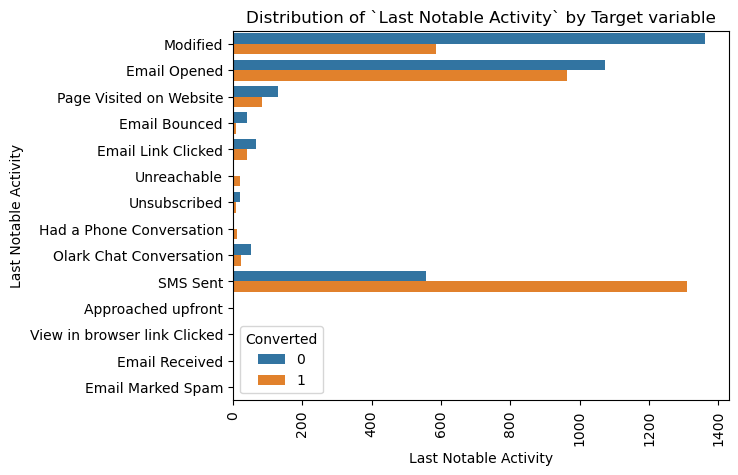

In [63]:
for c in cat_cols:
    display_conversion_rate(c)
    sns.countplot(data=leads_df,y=c,hue='Converted')
    # for container in ax.containers:
    #     ax.bar_label(container)
    plt.title(f'Distribution of `{c}` by Target variable')
    plt.xlabel(c)
    plt.xticks(rotation=90)
    plt.show()

**Inferences**  
- When the Lead Source is Lead Add form or References, the converted customers are high
- The conversion rate seems to be evenly distributed between 30% - 50% across all Specializations
- There is high conversion rate for Working professionals but majority of the leads seemed to be Unemployed
- The common last activity for converted customers seems to be SMS and Email
- A free copy of Mastering The Interview doesn't seem to have much impact on the conversion

# 5. Data Preparation for Logistic Regression 

## 5.1 Create dummy variables for all categorical variables

In [67]:
print(cat_cols)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [68]:
# Create dummy columns for all categorical columns except Specialization
cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']
leads_df = pd.get_dummies(data=leads_df,columns=cols,dtype='int',drop_first=True)

In [69]:
leads_df.shape

(6373, 58)

In [70]:
# Create dummy columns for Specialization
leads_df = pd.get_dummies(data=leads_df,columns=['Specialization'],dtype='int',drop_first=False)

In [71]:
# Drop Specialization_Select
leads_df.drop(columns=['Specialization_Select'],inplace=True)

In [72]:
leads_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# 6. Model Building

## 6.1 Split Data into training and test

In [75]:
# Checking shape before splitting
leads_df.shape

(6373, 75)

In [76]:
# y to contain only target variable
y=leads_df.pop('Converted')

In [77]:
# X is all remaining variable also our independent variables
X=leads_df

In [78]:
# Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [79]:
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (4461, 74)
y_train shape:  (4461,)
X_test shape:  (1912, 74)
y_test shape:  (1912,)


## 6.2 Feature Scaling

In [81]:
# Scale the numerical columns that have different scales
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [82]:
#Inspect stats for Training set after scaling
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
count,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,...,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000
mean,0.083014,0.238170,0.154698,0.568931,0.095046,0.004035,0.296794,0.004035,0.316073,0.000224,...,0.045730,0.021744,0.103340,0.025555,0.060973,0.013002,0.008518,0.004483,0.042591,0.024434
std,0.082831,0.249848,0.128750,0.495281,0.293311,0.063400,0.456896,0.063400,0.464994,0.014972,...,0.208922,0.145863,0.304437,0.157821,0.239307,0.113293,0.091911,0.066815,0.201957,0.154410
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.023256,0.015845,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.069767,0.130282,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.116279,0.453345,0.218750,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
5287,0.093023,0.091989,0.2500,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4399,0.162791,0.528609,0.4375,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8090,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5385,0.046512,0.035211,0.1250,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3805,0.046512,0.551056,0.1250,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## 6.3 Build a Model using RFE and Automated approach

#### Use RFE to eliminate some columns

In [85]:
estimator = LogisticRegression()
selector = RFE(estimator=estimator, n_features_to_select=15)

In [86]:
selector.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [87]:
list(zip(X_train.columns,selector.support_,selector.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 58),
 ('Lead Source_Direct Traffic', False, 32),
 ('Lead Source_Facebook', False, 57),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Live Chat', False, 50),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Social Media', False, 7),
 ('Lead Source_WeLearn', False, 59),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 56),
 ('Lead Source_testone', False, 42),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Click

In [88]:
cols_to_keep = X_train.columns[selector.support_]
print(cols_to_keep)

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')


# 7 Develop the model using statsmodels

In [90]:
# Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.GLM(y_train, X_train_sm,family=sm.families.Binomial()).fit()
    print(lm.summary())
    return lm

In [91]:
# Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

## 7.1 Model 1

In [93]:
lm1 = build_model(cols_to_keep)
get_vif(cols_to_keep)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2082.8
Date:                Sun, 17 Nov 2024   Deviance:                       4165.5
Time:                        18:38:19   Pearson chi2:                 4.59e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3633
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- The VIF values are all below 5 so let's drop the ones with high p-value starting with `Last Notable Activity_Had a Phone Conversation`

In [95]:
dropped_cols = ['Last Notable Activity_Had a Phone Conversation']
cols_to_keep = cols_to_keep.drop('Last Notable Activity_Had a Phone Conversation')

## 7.2 Model 2

In [97]:
lm2 = build_model(cols_to_keep)
get_vif(cols_to_keep)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2091.2
Date:                Sun, 17 Nov 2024   Deviance:                       4182.5
Time:                        18:38:19   Pearson chi2:                 4.60e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3609
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- All the columns have VIF below 5, less drop the one with high p-value : `What is your current occupation_Housewife`

In [99]:
dropped_cols.append('What is your current occupation_Housewife')
cols_to_keep = cols_to_keep.drop('What is your current occupation_Housewife')

## 7.3 Model 3

In [101]:
lm3 = build_model(cols_to_keep)
get_vif(cols_to_keep)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2097.0
Date:                Sun, 17 Nov 2024   Deviance:                       4193.9
Time:                        18:38:19   Pearson chi2:                 4.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3593
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- Both the VIFs and the p-values are now in the acceptable range. So we can finalize this model and evaluate it

# 8 Model Evaluation 

## 8.1 Predict for Train dataset

In [105]:
X_train_sm = sm.add_constant(X_train[cols_to_keep])

y_train_pred = lm3.predict(X_train_sm)

In [106]:
y_train_pred[:10]

5287    0.170158
4399    0.759097
8090    0.994977
5385    0.303359
3805    0.592546
4020    0.271696
5487    0.270641
3425    0.972259
2574    0.741684
2534    0.796635
dtype: float64

In [107]:
y_train_pred = y_train_pred.values.reshape(-1)

In [108]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob': y_train_pred})

In [109]:
y_train_pred_final.head()

,Converted,Converted_prob
0,0,0.170158
1,1,0.759097
2,1,0.994977
3,0,0.303359
4,0,0.592546


In [110]:
# Set the cutoff of 0.5 the probabilities for initial analysis
cut_off = 0.5

In [111]:
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_prob'].map(lambda x: 0 if x<cut_off else 1)

In [112]:
y_train_pred_final.head()

,Converted,Converted_prob,Predicted
0,0,0.170158,0
1,1,0.759097,1
2,1,0.994977,1
3,0,0.303359,0
4,0,0.592546,1


In [113]:
accuracy = metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])
print(accuracy)

0.7843532840170365


In [114]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])
print(confusion)

[[1902  400]
 [ 562 1597]]


|Actual v /Predicted > |not_converted|converted|
|---|---|---|
|not_converted|1900|402|
|converted|569|1590|

In [116]:
def generate_metrics(confusion):
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    return sensitivity, specificity

In [117]:
sensitivity , specificity = generate_metrics(confusion)
print(f'sensitivity = {sensitivity}')
print(f'specificity = {specificity}')

sensitivity = 0.7396943029180176
specificity = 0.8262380538662033


## 8.2 Plot ROC curve

In [119]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [120]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'], drop_intermediate = False )

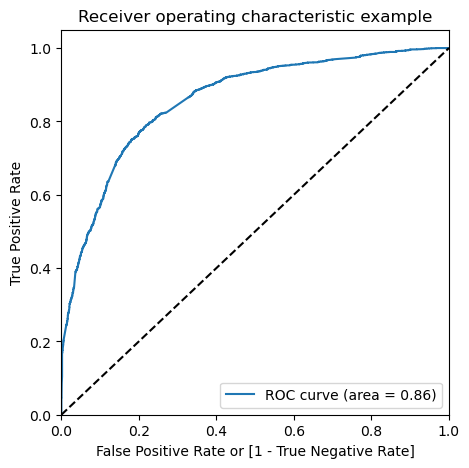

In [121]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

## 8.3 Finding Optimal cutoff point

In [123]:
# Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.170158,0,1,1,0,0,0,0,0,0,0,0
1,1,0.759097,1,1,1,1,1,1,1,1,1,0,0
2,1,0.994977,1,1,1,1,1,1,1,1,1,1,1
3,0,0.303359,0,1,1,1,1,0,0,0,0,0,0
4,0,0.592546,1,1,1,1,1,1,1,0,0,0,0


In [124]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.483972     1.000000     0.000000
0.1          0.1  0.550773     0.989347     0.139444
0.2          0.2  0.697377     0.944882     0.465248
0.3          0.3  0.749608     0.901343     0.607298
0.4          0.4  0.782112     0.799444     0.765856
0.5          0.5  0.784353     0.739694     0.826238
0.6          0.6  0.761713     0.635479     0.880104
0.7          0.7  0.733916     0.544233     0.911816
0.8          0.8  0.700291     0.432145     0.951781
0.9          0.9  0.639991     0.274664     0.982624


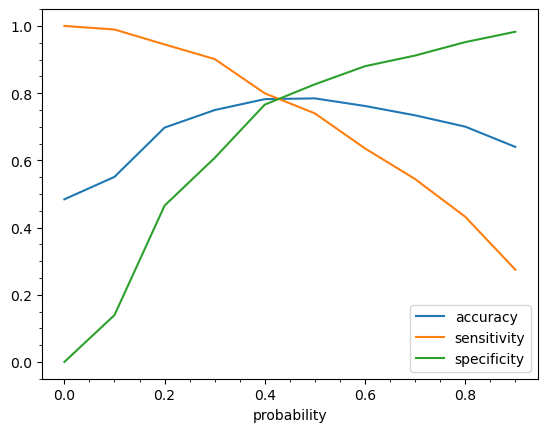

In [125]:
# Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.minorticks_on()
plt.show()

**Inference**  
- From the curve above the probability cutoff of **0.43** seems to be optimal


In [127]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final['Converted_prob'].map( lambda x: 1 if x > 0.43 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.170158,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.759097,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.994977,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.303359,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.592546,1,1,1,1,1,1,1,0,0,0,0,1


In [128]:
accuracy = metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['Final_Predicted'])
print(f'accuracy = {accuracy}')

confusion = metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Final_Predicted'])

precision = metrics.precision_score(y_train_pred_final['Converted'],y_train_pred_final['Final_Predicted'])
print(f'precision= {precision}')

recall = metrics.recall_score(y_train_pred_final['Converted'],y_train_pred_final['Final_Predicted'])
print(f'recall= {recall}')

sensitivity , specificity = generate_metrics(confusion)
print(f'sensitivity = {sensitivity}')
print(f'specificity = {specificity}')
print('\n')
print(f'confusion=\n {confusion}')

accuracy = 0.7843532840170365
precision= 0.7756794104099494
recall= 0.7799907364520612
sensitivity = 0.7799907364520612
specificity = 0.7884448305821026


confusion=
 [[1815  487]
 [ 475 1684]]


## 8.4 Precision and recall tradeoff

In [130]:
p, r, thresholds = metrics.precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

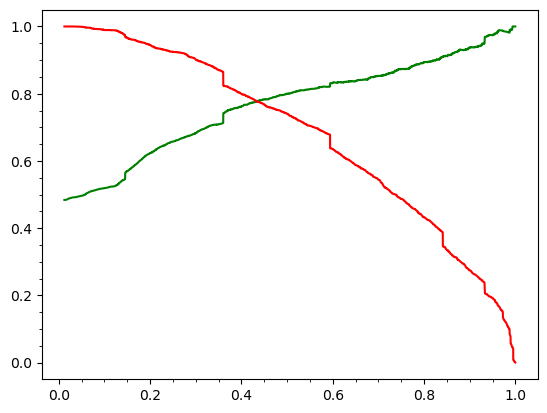

In [131]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.minorticks_on()
plt.show()

# 9. Making predictions on Test data

## 9.1 Scaling

In [134]:
# Scale the numerical columns that have different scales
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

# Transform test set
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [135]:
X_test_sm = sm.add_constant(X_test[cols_to_keep])

y_test_pred = lm3.predict(X_test_sm)

In [136]:
y_test_pred[:10]

4430    0.360019
4208    0.758202
6921    0.593620
6962    0.409345
7106    0.145135
3665    0.792218
7086    0.145135
1504    0.369235
2505    0.360019
3236    0.360019
dtype: float64

In [137]:
y_test_pred = y_test_pred.values.reshape(-1)

In [138]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_prob': y_test_pred})

In [139]:
# Using the optimal cutoff of 0.43
cut_off = 0.43
y_test_pred_final['Predicted'] = y_test_pred_final['Converted_prob'].map(lambda x: 0 if x<cut_off else 1)

In [140]:
accuracy = metrics.accuracy_score(y_test_pred_final['Converted'],y_test_pred_final['Predicted'])
print(f'accuracy = {accuracy}')

confusion = metrics.confusion_matrix(y_test_pred_final['Converted'],y_test_pred_final['Predicted'])

precision = metrics.precision_score(y_test_pred_final['Converted'],y_test_pred_final['Predicted'])
print(f'precision= {precision}')

recall = metrics.recall_score(y_test_pred_final['Converted'],y_test_pred_final['Predicted'])
print(f'recall= {recall}')

sensitivity , specificity = generate_metrics(confusion)
print(f'sensitivity = {sensitivity}')
print(f'specificity = {specificity}')
print('\n')
print(f'confusion=\n {confusion}')

accuracy = 0.8064853556485355
precision= 0.7984409799554566
recall= 0.7913907284768212
sensitivity = 0.7913907284768212
specificity = 0.820079522862823


confusion=
 [[825 181]
 [189 717]]


In [141]:
cols_to_keep

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

# Final feature list
- `TotalVisits`
- `Total Time Spent on Website`
- `Page Views Per Visit`
- `Lead Origin_Lead Add Form`
- `Lead Source_Olark Chat`
- `Lead Source_Welingak Website` 
- `Do Not Email_Yes`
- `Last Activity_Converted to Lead`
- `Last Activity_Had a Phone Conversation`
- `Last Activity_Olark Chat Conversation`
- `Last Activity_SMS Sent`
- `What is your current occupation_Working Professional`
- `Last Notable Activity_Unreachable`